# TELECOM CHURN CASE STUDY

## Problem Statement
In the telecom industry, customers are able to choose from multiple service providers and actively switch 
from one operator to another. In this highly competitive market, the telecommunications industry
experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire 
a new customer than to retain an existing one, customer retention has now become even more 
important than customer acquisition.To reduce customer churn, telecom companies need to predict 
which customers are at high risk of churn.

### Business Objective
The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features)
from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

#### Steps : 

    - Data Understanding
    - Data Preparation
        1. Derive New Features
        2. Filter High-Value Customers
        3. Tag Churners and remove attributes of the churn phase
    - EDA
    - Modelling

### Importing Modules & Required Libraries

In [1]:
# Importing required libraries 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Importing DataSet

In [2]:
# Importing Telecom dataset
tel_df = pd.read_csv('telecom_churn_data.csv')
tel_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


### Data Understanding

In [3]:
tel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [4]:
tel_df.shape

(99999, 226)

In [5]:
null_val = []
for col in tel_df.columns:
    if tel_df[''+col+''].isnull().mean() > 0.1 :
        print('null values of {0} is---> {1} '.format(col,tel_df[''+col+''].isnull().mean()*100))
        null_val.append(col)

null values of date_of_last_rech_data_6 is---> 74.84674846748467 
null values of date_of_last_rech_data_7 is---> 74.42874428744287 
null values of date_of_last_rech_data_8 is---> 73.66073660736608 
null values of date_of_last_rech_data_9 is---> 74.07774077740777 
null values of total_rech_data_6 is---> 74.84674846748467 
null values of total_rech_data_7 is---> 74.42874428744287 
null values of total_rech_data_8 is---> 73.66073660736608 
null values of total_rech_data_9 is---> 74.07774077740777 
null values of max_rech_data_6 is---> 74.84674846748467 
null values of max_rech_data_7 is---> 74.42874428744287 
null values of max_rech_data_8 is---> 73.66073660736608 
null values of max_rech_data_9 is---> 74.07774077740777 
null values of count_rech_2g_6 is---> 74.84674846748467 
null values of count_rech_2g_7 is---> 74.42874428744287 
null values of count_rech_2g_8 is---> 73.66073660736608 
null values of count_rech_2g_9 is---> 74.07774077740777 
null values of count_rech_3g_6 is---> 74.846

--Inference : There are columnss with `rech` where null represents no recharge amount in that 
particular month

### Data Preparation

#### 1. Derive New Features

In [6]:
# Getting all RECH col in one list 
rech_col = [col for col in tel_df.columns if (('rech_amt' in col or 'rech_data' in col) & ('date' not in col)) ]
rech_col

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

Exploring rech col for better understanding 

In [7]:
tel_df[rech_col].describe(include='all')

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,107.728207,101.943889,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,126.902505,125.375109,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,30.000000,28.000000,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,98.000000,61.000000,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,144.000000,144.000000,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,35190.000000,40335.000000,45320.000000,37235.000000,4010.000000,4010.000000,4449.000000,3399.000000,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


We have null values present in the columns , thus need to replace them with 0 as null values represent no recharge done.

We don't need to impute for month 9 as it would anyhow would get dropped

#### 2. Filter High-Value Customers

Need to predict churn only for the high-value customers. Define high-value customers as follows: 
Those who have recharged with an amount more than or equal to X, where X is the 70th percentile 
of the average recharge amount in the first two months (the good phase).

In [8]:
tel_df[rech_col] = tel_df[rech_col].apply(lambda x : x.fillna(0))

Creating column for high-value customers recharges

In [9]:
tel_df['av_rech_amt_67'] = (((tel_df['total_rech_data_6'] * tel_df['av_rech_amt_data_6']) + tel_df['total_rech_amt_6'])
                         + ((tel_df['total_rech_data_7'] * tel_df['av_rech_amt_data_7']) + tel_df['total_rech_amt_7']))/2

Getting the 70%ile which defines the High-Value Customer

In [10]:
tel_df.av_rech_amt_67.quantile(0.7)

478.0

Extracting data for High Value customers

In [11]:
telcom_hv_df = tel_df[tel_df.av_rech_amt_67 >= tel_df.av_rech_amt_67.quantile(0.7)]
telcom_hv_df.shape

(30001, 227)

#### 3. Tagging Churners

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

- total_ic_mou_9

- total_og_mou_9

- vol_2g_mb_9

- vol_3g_mb_9

In [12]:
# List for predicting churn
churn_var_list = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']

In [13]:
telcom_hv_df[churn_var_list].isnull().mean()

total_ic_mou_9    0.0
total_og_mou_9    0.0
vol_2g_mb_9       0.0
vol_3g_mb_9       0.0
dtype: float64

In [14]:
# Creating new col for combined data and call usage
telcom_hv_df['total_calls_9'] = telcom_hv_df['total_ic_mou_9'] + telcom_hv_df['total_og_mou_9']
telcom_hv_df['total_data_9'] = telcom_hv_df['vol_2g_mb_9'] + telcom_hv_df['vol_3g_mb_9']

Creating Churn variable based on above two col for predicting customer churn

- 1-->CHURN
- 0-->NO CHURN

In [15]:
telcom_hv_df['Churn'] = telcom_hv_df.apply(lambda val: 1 if (val.total_calls_9 == 0 and val.total_data_9 == 0) 
                                           else 0, axis=1)

In [16]:
telcom_hv_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,av_rech_amt_67,total_calls_9,total_data_9,Churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,NaN,968,30.40,0.00,101.20,3.58,559.0,0.00,0.00,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,NaN,802,57.74,19.38,18.74,0.00,1185.0,0.00,0.00,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,NaN,315,21.03,910.65,122.16,0.00,696.0,177.09,0.00,0
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,...,NaN,720,0.00,0.00,0.00,0.00,640.0,1284.14,0.00,0
23,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,74.350,...,1.0,604,40.45,51.86,0.00,0.00,583.0,255.11,328.67,0


Checking ratio of Churn 

In [17]:
(telcom_hv_df.Churn.value_counts()/telcom_hv_df.shape[0])*100

0    91.863605
1     8.136395
Name: Churn, dtype: float64

### Handling Missing Values

As month 9 would be the churn month so the data  inn this month would be of no use hence dropping

In [18]:
telcom_hv_df = telcom_hv_df.filter(regex='[^9]$', axis=1)
telcom_hv_df.shape

(30001, 174)

In [19]:
telcom_hv_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 174 entries, mobile_number to Churn
dtypes: float64(137), int64(28), object(9)
memory usage: 40.1+ MB


#### Dropping columns having just one unique value

In [20]:
one_unq_val_var = [ col for col in telcom_hv_df.columns if telcom_hv_df[''+col+''].nunique() < 2 ]
telcom_hv_df.drop(one_unq_val_var, axis=1, inplace= True)

Dropping Mobile Number as it is not useful in prediction

In [21]:
telcom_hv_df.drop('mobile_number', axis=1, inplace=True)

In [22]:
date_var = [col for col in telcom_hv_df.columns if 'date' in col]
date_var

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

Now checking for hidden Categorical variables 

In [23]:
cat_var = [ col for col in telcom_hv_df.columns if  telcom_hv_df[''+col+''].nunique() < 3 ]
cat_var

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'Churn']

In [24]:
telcom_hv_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 160 entries, arpu_6 to Churn
dtypes: float64(128), int64(26), object(6)
memory usage: 36.9+ MB


In [25]:
num_var = [col for col in telcom_hv_df.columns if col not in cat_var+date_var]
num_var

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

In [26]:
len(num_var) + len(cat_var) + len(date_var) == telcom_hv_df.shape[1]

True

#### Imputing values for possible variables

In [27]:
#telcom_hv_df[cat_var] = telcom_hv_df[cat_var].apply(lambda var : var.fillna(-1))

In [28]:
telcom_hv_df[cat_var].isnull().mean()*100

night_pck_user_6    44.148528
night_pck_user_7    43.145228
night_pck_user_8    46.825106
fb_user_6           44.148528
fb_user_7           43.145228
fb_user_8           46.825106
Churn                0.000000
dtype: float64

Dropping all columns in cat_var except Churn as they have more than 30% missing values

In [29]:
cat_var.pop()
telcom_hv_df.drop(cat_var, axis =1, inplace = True)

In [30]:
telcom_hv_df['Churn'] = telcom_hv_df['Churn'].astype('category')

In [31]:
for col in num_var:
    if telcom_hv_df[''+col+''].isnull().mean() > 0 :
        print('null values of {0} is---> {1} '.format(col,telcom_hv_df[''+col+''].isnull().mean()*100))

null values of onnet_mou_6 is---> 1.8166061131295623 
null values of onnet_mou_7 is---> 1.7899403353221561 
null values of onnet_mou_8 is---> 3.9132028932368925 
null values of offnet_mou_6 is---> 1.8166061131295623 
null values of offnet_mou_7 is---> 1.7899403353221561 
null values of offnet_mou_8 is---> 3.9132028932368925 
null values of roam_ic_mou_6 is---> 1.8166061131295623 
null values of roam_ic_mou_7 is---> 1.7899403353221561 
null values of roam_ic_mou_8 is---> 3.9132028932368925 
null values of roam_og_mou_6 is---> 1.8166061131295623 
null values of roam_og_mou_7 is---> 1.7899403353221561 
null values of roam_og_mou_8 is---> 3.9132028932368925 
null values of loc_og_t2t_mou_6 is---> 1.8166061131295623 
null values of loc_og_t2t_mou_7 is---> 1.7899403353221561 
null values of loc_og_t2t_mou_8 is---> 3.9132028932368925 
null values of loc_og_t2m_mou_6 is---> 1.8166061131295623 
null values of loc_og_t2m_mou_7 is---> 1.7899403353221561 
null values of loc_og_t2m_mou_8 is---> 3.9

Dropping Columns having more than 40% null values 

In [32]:
num_var1 = []
for col in num_var:
    if telcom_hv_df[''+col+''].isnull().mean() > 0.4:
        telcom_hv_df.drop(col, axis =1 , inplace=True)
    else:
        num_var1.append(col)

In [33]:
telcom_hv_df[num_var1].describe(include ='all')

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,av_rech_amt_67
count,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,...,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,558.490824,560.782203,508.597957,265.618262,272.700470,243.646938,380.608111,384.994337,348.723294,16.408431,...,0.211026,0.209393,0.227492,0.202393,1209.368754,169.138860,178.872765,158.523962,8.029788,1152.620628
std,460.640461,479.776947,501.961981,462.493645,482.972367,465.200856,484.257474,500.807874,486.918550,76.973057,...,0.617549,0.985674,1.089929,1.100107,957.677989,420.974354,443.544138,416.734860,52.378232,1358.713982
min,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,478.000000
25%,309.865000,309.826000,231.473000,19.240000,18.155000,14.255000,78.575000,76.040000,58.670000,0.000000,...,0.000000,0.000000,0.000000,0.000000,460.000000,0.000000,0.000000,0.000000,0.000000,603.000000
50%,481.694000,480.943000,427.585000,88.060000,86.885000,72.930000,229.635000,227.120000,197.590000,0.000000,...,0.000000,0.000000,0.000000,0.000000,846.000000,0.000000,0.000000,0.000000,0.000000,800.000000
75%,699.943000,698.315000,661.491000,297.415000,298.087500,255.025000,494.780000,500.365000,455.385000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1756.000000,128.800000,137.290000,98.440000,0.000000,1208.000000
max,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,10752.560000,8362.360000,9667.130000,14007.340000,2613.310000,...,16.000000,29.000000,35.000000,41.000000,4321.000000,12916.220000,9165.600000,11166.210000,2618.570000,61236.000000


As for most of the columns the min value is 0 which means the entry is zero hence imputing with zero

In [34]:
telcom_hv_df[num_var1] = telcom_hv_df[num_var1].apply(lambda x: x.fillna(0))

Dropping Date Column as after combining month 6&7 to form Good Phase Date columns won't add up 

In [35]:
telcom_hv_df.drop(date_var, axis=1, inplace= True)

In [36]:
flag=0
for col in telcom_hv_df.columns:
    if telcom_hv_df[''+col+''].isnull().mean() > 0 :
        print('null values of {0} is---> {1} '.format(col,telcom_hv_df[''+col+''].isnull().mean()*100))
        flag = 1
if flag!=1:
    print('No NULL Values')

No NULL Values


In [37]:
print('Proceeding with {0} rows and {1} columns'.format(telcom_hv_df.shape[0], telcom_hv_df.shape[1]))

Proceeding with 30001 rows and 136 columns


The months are divided into 3 :
- Good Phase( 6 & 7 )
- Action Phase( 8 )
- Churn Phase( 9 )

Let's average 6 & 7 month to get good phase but before let's drop few least required columns

In [38]:
og_mou_lst = [ col for col in telcom_hv_df.columns if '_og_mou' in col]

og_mou_lst

['roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8']

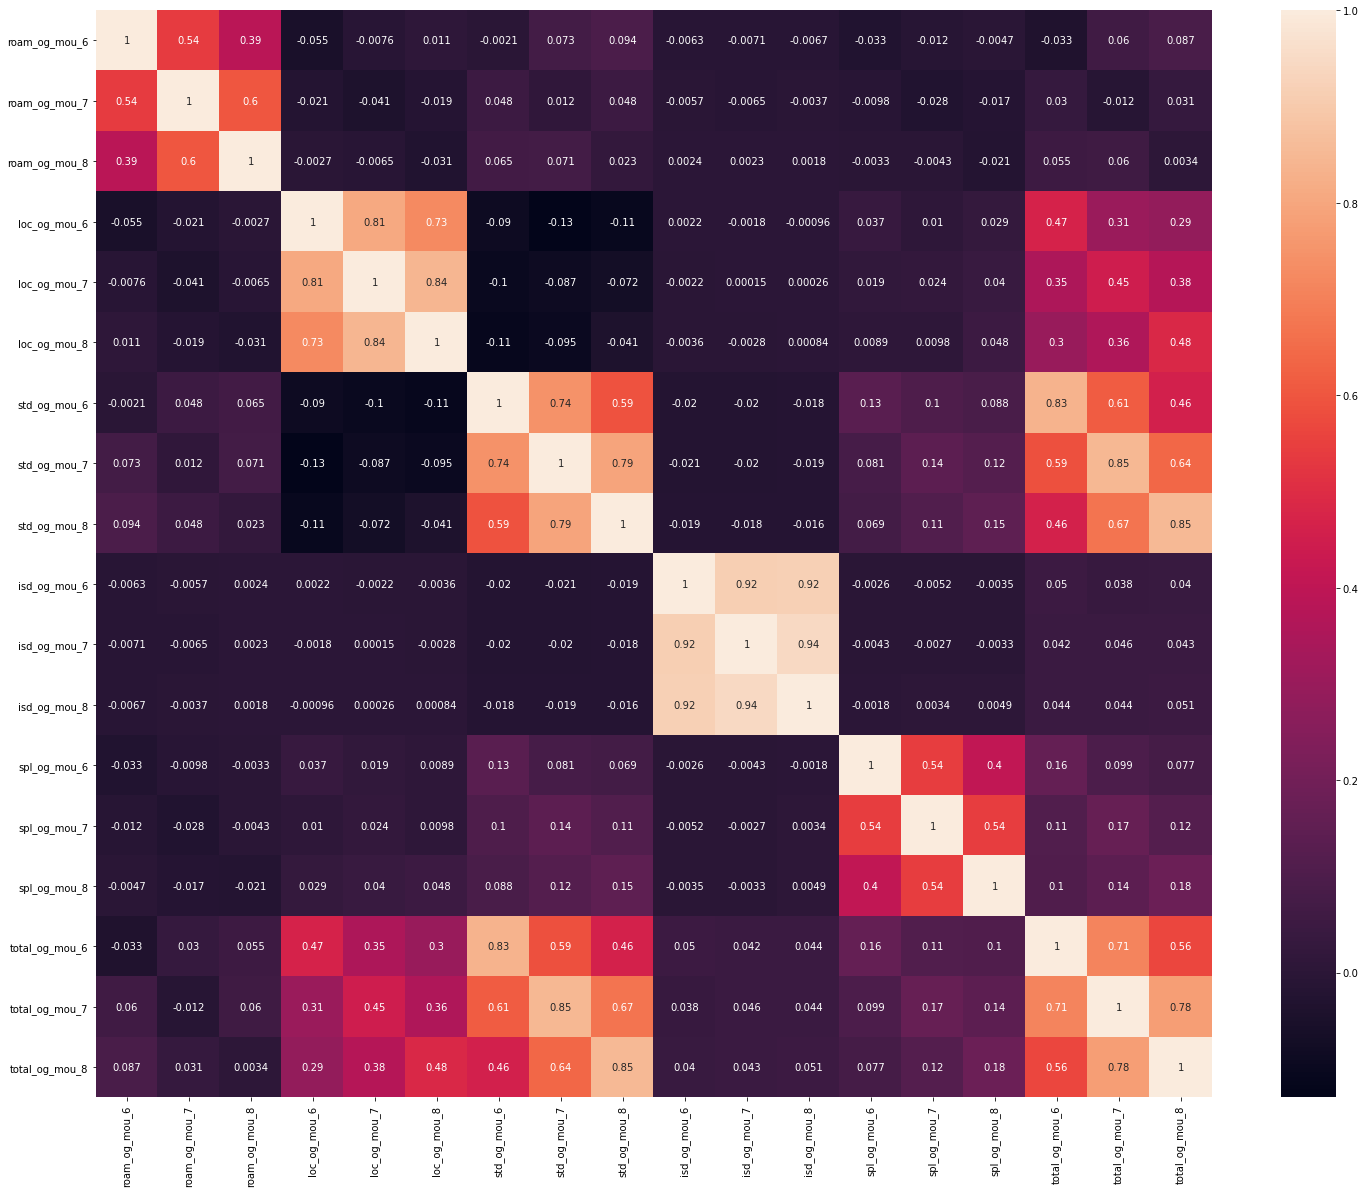

In [39]:
corr = telcom_hv_df[og_mou_lst].corr()
plt.figure(figsize=(25,20))
sb.heatmap(corr, annot = True)
plt.show()

From the above heatmap we can see that few variables are correlated with others
these are `std_og_mou` ,`loc_og_mou`, `total_og_mou`

In [40]:
# Getting above variables 
total_og_list = list(telcom_hv_df.columns[telcom_hv_df.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)])

#Dropping
telcom_hv_df.drop(total_og_list, axis = 1, inplace = True)

In [41]:
telcom_hv_df.shape

(30001, 127)

In [42]:
# Dropping Earlier av_rech_amt_67 column as we are creating new anyway
telcom_hv_df.drop(['av_rech_amt_67'], axis =1, inplace=True)

In [43]:
col_list = telcom_hv_df.filter(regex='_6|_7').columns.str[:-2]
for col in (col_list.unique()):
    avg_col_name = col+"_av67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    telcom_hv_df[avg_col_name] = (telcom_hv_df[col_6]  + telcom_hv_df[col_7])/ 2

In [44]:
# Dropping earlier 6 & 7 months columns
lst_6_7 = telcom_hv_df.filter(regex = '_6|_7')
telcom_hv_df.drop(lst_6_7, axis =1, inplace= True )
telcom_hv_df.shape

(30001, 86)

In [45]:
telcom_hv_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 86 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   arpu_8                 30001 non-null  float64 
 1   onnet_mou_8            30001 non-null  float64 
 2   offnet_mou_8           30001 non-null  float64 
 3   roam_ic_mou_8          30001 non-null  float64 
 4   roam_og_mou_8          30001 non-null  float64 
 5   loc_og_t2t_mou_8       30001 non-null  float64 
 6   loc_og_t2m_mou_8       30001 non-null  float64 
 7   loc_og_t2f_mou_8       30001 non-null  float64 
 8   loc_og_t2c_mou_8       30001 non-null  float64 
 9   std_og_t2t_mou_8       30001 non-null  float64 
 10  std_og_t2m_mou_8       30001 non-null  float64 
 11  std_og_t2f_mou_8       30001 non-null  float64 
 12  isd_og_mou_8           30001 non-null  float64 
 13  spl_og_mou_8           30001 non-null  float64 
 14  og_others_8            30001 non-null 

With merging June and July columns we managed to reduce the columns from 136 to 86 

In [46]:
telcom = telcom_hv_df.copy()

### EDA

<AxesSubplot:xlabel='av_rech_amt_data_av67', ylabel='Density'>

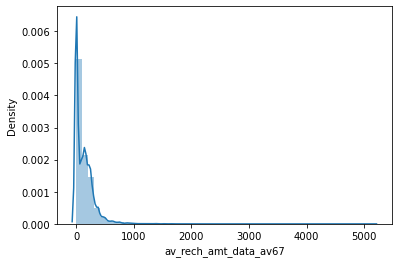

In [47]:
# Recharge for good phase
sb.distplot(telcom.av_rech_amt_data_av67)

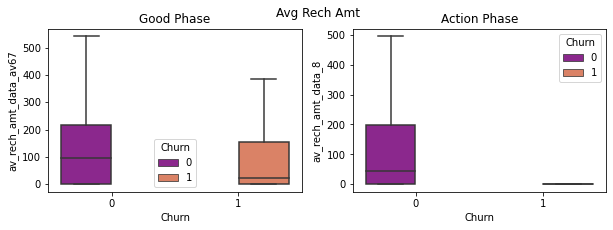

In [48]:
plt.figure(figsize=(10, 3))  
plt.subplot(1,2,1)
plt.title("Good Phase")
plt.suptitle("Avg Rech Amt")
sb.boxplot(data=telcom, y=telcom.av_rech_amt_data_av67,x="Churn",hue="Churn",
                showfliers=False,palette=("plasma")) 
plt.subplot(1,2,2)
plt.title("Action Phase")
sb.boxplot(data=telcom, y=telcom.av_rech_amt_data_8,x="Churn",hue="Churn",
                showfliers=False,palette=("plasma"))
plt.show()

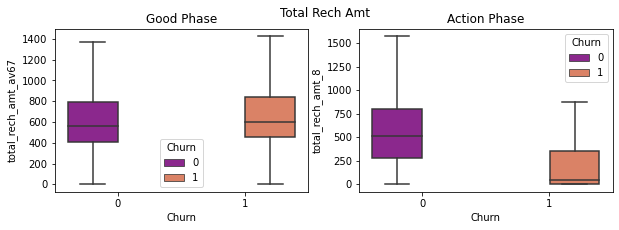

In [49]:
plt.figure(figsize=(10, 3))  
plt.subplot(1,2,1)
plt.title("Good Phase")
plt.suptitle("Total Rech Amt")
sb.boxplot(data=telcom, y=telcom.total_rech_amt_av67,x="Churn",hue="Churn",
                showfliers=False,palette=("plasma"))
plt.subplot(1,2,2)
plt.title("Action Phase")
sb.boxplot(data=telcom, y=telcom.total_rech_amt_8,x="Churn",hue="Churn",
                showfliers=False,palette=("plasma"))
plt.show()

Recharge amount dropped significantly 

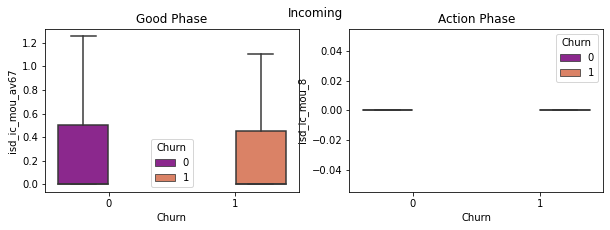

In [50]:
plt.figure(figsize=(10, 3))  
plt.subplot(1,2,1)
plt.title("Good Phase")
plt.suptitle("Incoming")
sb.boxplot(data=telcom, y=telcom.isd_ic_mou_av67,x="Churn",hue="Churn",
                showfliers=False,palette=("plasma"))
plt.subplot(1,2,2)
plt.title("Action Phase")
sb.boxplot(data=telcom, y=telcom.isd_ic_mou_8,x="Churn",hue="Churn",
                showfliers=False,palette=("plasma"))
plt.show()

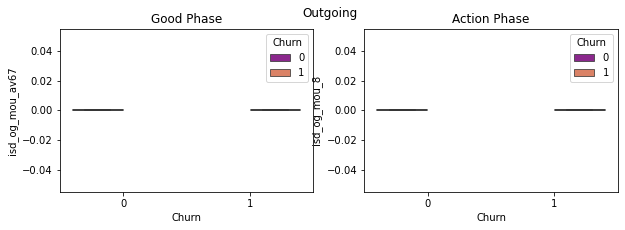

In [51]:
plt.figure(figsize=(10, 3))  
plt.subplot(1,2,1)
plt.title("Good Phase")
plt.suptitle("Outgoing")
sb.boxplot(data=telcom, y=telcom.isd_og_mou_av67,x="Churn",hue="Churn",
                showfliers=False,palette=("plasma"))
plt.subplot(1,2,2)
plt.title("Action Phase")
sb.boxplot(data=telcom, y=telcom.isd_og_mou_8,x="Churn",hue="Churn",
                showfliers=False,palette=("plasma"))
plt.show()

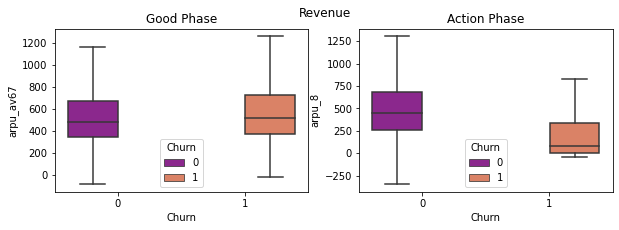

In [52]:
plt.figure(figsize=(10, 3))  
plt.subplot(1,2,1)
plt.title("Good Phase")
plt.suptitle("Revenue")
sb.boxplot(data=telcom, y=telcom.arpu_av67,x="Churn",hue="Churn",
                showfliers=False,palette=("plasma"))
plt.subplot(1,2,2)
plt.title("Action Phase")
sb.boxplot(data=telcom, y=telcom.arpu_8,x="Churn",hue="Churn",
                showfliers=False,palette=("plasma"))
plt.show()

We see huge drop in the average revenue per user from good to action phase 

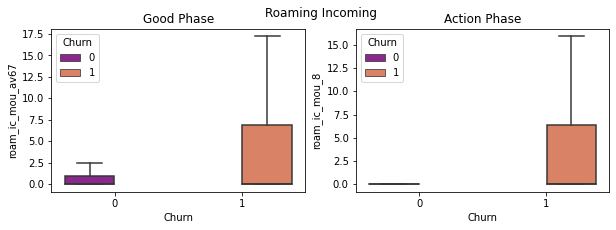

In [53]:
plt.figure(figsize=(10, 3))  
plt.subplot(1,2,1)
plt.title("Good Phase")
plt.suptitle("Roaming Incoming")
sb.boxplot(data=telcom, y=telcom.roam_ic_mou_av67,x="Churn",hue="Churn",
                showfliers=False,palette=("plasma"))
plt.subplot(1,2,2)
plt.title("Action Phase")
sb.boxplot(data=telcom, y=telcom.roam_ic_mou_8,x="Churn",hue="Churn",
                showfliers=False,palette=("plasma"))
plt.show()

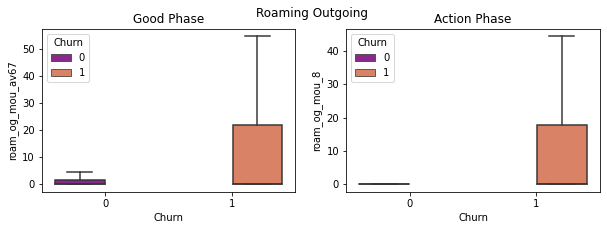

In [54]:
plt.figure(figsize=(10, 3))  
plt.subplot(1,2,1)
plt.title("Good Phase")
plt.suptitle("Roaming Outgoing")
sb.boxplot(data=telcom, y=telcom.roam_og_mou_av67,x="Churn",hue="Churn",
                showfliers=False,palette=("plasma"))
plt.subplot(1,2,2)
plt.title("Action Phase")
sb.boxplot(data=telcom, y=telcom.roam_og_mou_8,x="Churn",hue="Churn",
                showfliers=False,palette=("plasma"))
plt.show()

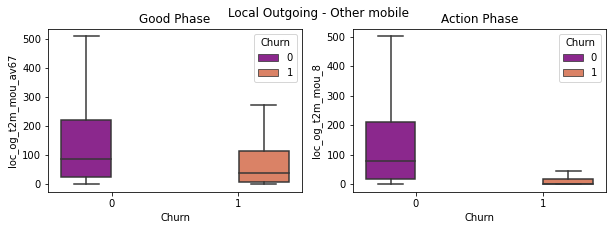

In [55]:
plt.figure(figsize=(10, 3))  
plt.subplot(1,2,1)
plt.title("Good Phase")
plt.suptitle("Local Outgoing - Other mobile")
sb.boxplot(data=telcom, y=telcom.loc_og_t2m_mou_av67,x="Churn",hue="Churn",
                showfliers=False,palette=("plasma"))
plt.subplot(1,2,2)
plt.title("Action Phase")
sb.boxplot(data=telcom, y=telcom.loc_og_t2m_mou_8,x="Churn",hue="Churn",
                showfliers=False,palette=("plasma"))
plt.show()

We see there's a huge drop in the Action Phase when Outgoing call is made to other operator mobile

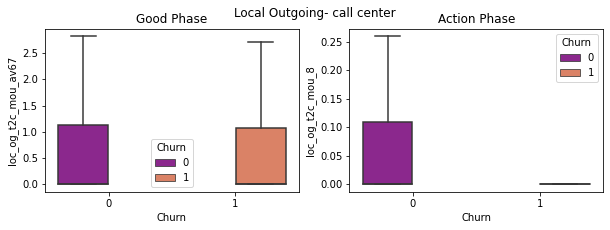

In [56]:
plt.figure(figsize=(10, 3))  
plt.subplot(1,2,1)
plt.title("Good Phase")
plt.suptitle("Local Outgoing- call center")
sb.boxplot(data=telcom, y=telcom.loc_og_t2c_mou_av67,x="Churn",hue="Churn",
                showfliers=False,palette=("plasma"))
plt.subplot(1,2,2)
plt.title("Action Phase")
sb.boxplot(data=telcom, y=telcom.loc_og_t2c_mou_8,x="Churn",hue="Churn",
                showfliers=False,palette=("plasma"))
plt.show()

We see there's a huge drop in the Action Phase when call made to call center in Good Phase

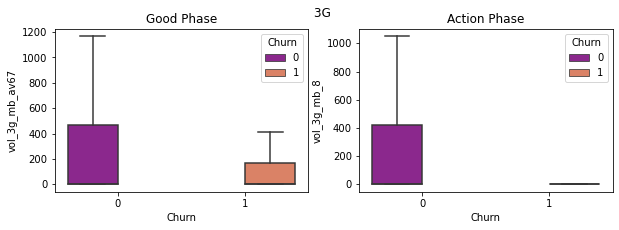

In [57]:
plt.figure(figsize=(10, 3))  
plt.subplot(1,2,1)
plt.title("Good Phase")
plt.suptitle("3G ")
sb.boxplot(data=telcom, y=telcom.vol_3g_mb_av67,x="Churn",hue="Churn",
                showfliers=False,palette=("plasma"))
plt.subplot(1,2,2)
plt.title("Action Phase")
sb.boxplot(data=telcom, y=telcom.vol_3g_mb_8,x="Churn",hue="Churn",
                showfliers=False,palette=("plasma"))
plt.show()

We see there's a huge drop in the Action Phase for 3g

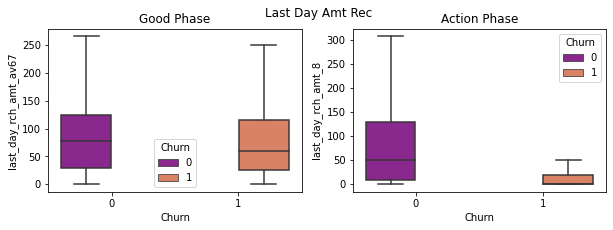

In [58]:
plt.figure(figsize=(10, 3))  
plt.subplot(1,2,1)
plt.title("Good Phase")
plt.suptitle("Last Day Amt Rec")
sb.boxplot(data=telcom, y=telcom.last_day_rch_amt_av67,x="Churn",hue="Churn",
                showfliers=False,palette=("plasma"))
plt.subplot(1,2,2)
plt.title("Action Phase")
sb.boxplot(data=telcom, y=telcom.last_day_rch_amt_8,x="Churn",hue="Churn",
                showfliers=False,palette=("plasma"))
plt.show()

We see there's huge drop in the Action Phase

### Modelling

In [59]:
# Splitting dependent and indeoendent variables into X and y
y = telcom['Churn']
X = telcom.drop(['Churn'], axis=1)

In [60]:
# Importing required libraries 
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA
from sklearn.model_selection import train_test_split

In [61]:
# Importing Metrics
from sklearn.metrics import recall_score, precision_score, roc_auc_score, f1_score, accuracy_score, confusion_matrix

We have imported SMOTE , this helps us to deal with class imbalance as we saw 9:91 churn ratio

Defining some repetitive definitions to be used ahead

In [62]:
def split_df(df):        # To Split the dataframe into X and y 
    y = df['Churn']
    X = df.drop(['Churn'], axis=1)
    print('df splitted..')
    return X,y

def scale_df(X):         # To scale the X
    # Instantiating StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_df = pd.DataFrame(X_scaled, columns= X.columns)
    print('df scaled..')
    return X_df

def resampling_df(X, y, f_num):  # To apply SMOTE on X_train and give PCA and split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)
    print('train df before : ', X_train.shape)
    print('Applying SMOTE...')
    
    # Initantiating SMOTE
    smote = SMOTE()
    X_tra,y_tra = smote.fit_resample(X_train, y_train)
    print('train df after SMOTE : ',X_tra.shape)
    
    # Instantiating IncrementalPCA
    pca = IncrementalPCA(n_components = f_num)
    X_train_pca = pca.fit_transform(X_tra)
    X_test_pca = pca.transform(X_test)
    print('df after PCA : ',X_train_pca.shape)
    return X_train_pca,X_test_pca,y_tra,y_test


In [63]:
# Scaling X df
X_scaled = scale_df(X)
X_scaled.head(2)

df scaled..


,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,...,last_day_rch_amt_av67,total_rech_data_av67,max_rech_data_av67,av_rech_amt_data_av67,vol_2g_mb_av67,vol_3g_mb_av67,monthly_2g_av67,sachet_2g_av67,monthly_3g_av67,sachet_3g_av67
0,-0.587295,-0.510671,-0.695102,-0.168644,-0.189707,-0.343393,-0.649485,-0.301836,-0.236923,-0.373383,...,1.305790,-0.281094,1.676616,0.641666,-0.366917,-0.285798,-0.461314,-0.47212,1.359752,-0.230437
1,5.305036,-0.396611,-0.019017,0.258208,0.173748,-0.166236,0.045037,2.427634,-0.236923,-0.343173,...,-0.868008,-0.650586,-0.765067,-0.742965,-0.419329,-0.425285,-0.461314,-0.47212,-0.391135,-0.230437


Plotting Scree Plot to get an idea of the required features that can explain variance

In [64]:
sb.set(style="whitegrid")

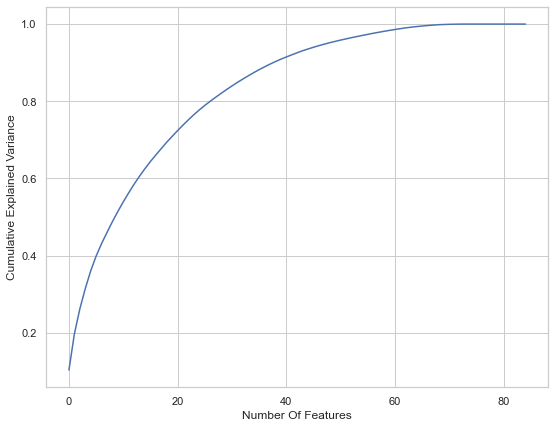

In [65]:
# Instantiating PCA
pca_scree = PCA(random_state=87)
pca_scree.fit(X_scaled)
plt.figure(figsize=(9,7))
plt.plot(np.cumsum(pca_scree.explained_variance_ratio_))
plt.xlabel('Number Of Features')
plt.ylabel('Cumulative Explained Variance')
plt.show()

~ 40 - 60 Features can explain 90-95% variance in the data set

In [66]:
def model_data(df):      # To combine all the above methods and get a df to work on
    X,y = split_df(df)
    X_train,X_test,y_train,y_test = resampling_df(scale_df(X), y, 60)
    return X_train,X_test,y_train,y_test

score_summary = pd.DataFrame()



def model_metrics(y_test, y_pred, model):
    print(model+" score summary")
    con_mat = confusion_matrix(y_test, y_pred)
    print(con_mat)
    print('accuracy = ', round(accuracy_score(y_test,y_pred),2))
    print('recall = ',round(recall_score(y_test,y_pred),2))
    print('precision =', round(precision_score(y_test,y_pred),2))
    print('auc = ',round(roc_auc_score(y_test,y_pred),2))
    print('f1 = ',round(f1_score(y_test,y_pred),2))
    data = [[model,round(accuracy_score(y_test,y_pred),2),round(recall_score(y_test,y_pred),2),
             round(precision_score(y_test,y_pred),2),round(roc_auc_score(y_test,y_pred),2),round(f1_score(y_test,y_pred),2)]] 
    df = pd.DataFrame(data, columns = ['Model', 'Accuracy','Precision','Recall','AUC','F1'])
    global score_summary
    score_summary = score_summary.append(df, ignore_index=True)

#### Building models 

#### Logistic Regression Model

In [67]:
# Importing Required libraries 
from sklearn.linear_model import LogisticRegression

In [68]:
# Making a copy 
telcom_log = telcom_hv_df.copy()
X_train,X_test,y_train,y_test = model_data(telcom_log)

df splitted..
df scaled..
train df before :  (21000, 85)
Applying SMOTE...
train df after SMOTE :  (38618, 85)
df after PCA :  (38618, 60)


In [69]:
# Instantiating 
lr = LogisticRegression()
# FItting
lr_model = lr.fit(X_train, y_train)

In [70]:
# Predicting
y_pred_prob = lr_model.predict_proba(X_test)[:,1]
print('Logistic Regression score '+'{:2.2f}'.format(roc_auc_score(y_test,y_pred_prob)))

Logistic Regression score 0.90


In [71]:
model_metrics(y_test, lr_model.predict(X_test),'Logistic ')

Logistic  score summary
[[6865 1386]
 [ 125  625]]
accuracy =  0.83
recall =  0.83
precision = 0.31
auc =  0.83
f1 =  0.45


#### XGBoost

In [72]:
# Importing required libraries 
import xgboost as xg
from xgboost import XGBClassifier
from xgboost import plot_importance

In [73]:
# making a copy
telcom_xgb = telcom_hv_df.copy()
# getting data
X_train, X_test, y_train, y_test = model_data(telcom_xgb)


df splitted..
df scaled..
train df before :  (21000, 85)
Applying SMOTE...
train df after SMOTE :  (38618, 85)
df after PCA :  (38618, 60)


In [74]:
# Instantiating 
xgb = XGBClassifier(random_state=87)
xgb.fit(X_train,y_train)

[21:29:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=87,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [75]:
# Predicting
y_pred = xgb.predict(X_test)
model_metrics(y_test,y_pred,'XGBoost')

XGBoost score summary
[[7717  534]
 [ 270  480]]
accuracy =  0.91
recall =  0.64
precision = 0.47
auc =  0.79
f1 =  0.54


#### Tuning XG Model

In [76]:
# importing required libraries
from sklearn.model_selection import GridSearchCV

In [77]:
params = {'learning_rate': [0.2,0.3,0.4], 
             'subsample': [0.4,0.5,0.6],
              'max_depth': [5]
             }

In [78]:
# Building model again
xg = XGBClassifier(n_estimators=100,random_state = 87)
# Grid Search
grid_xgb = GridSearchCV(estimator=xg,
                       param_grid=params,
                       scoring='accuracy',
                       cv=5,
                       n_jobs=-1,
                       verbose=1,
                       return_train_score=True)
# Fitting the model
grid_xgb.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[21:34:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=87,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, v

In [79]:
print('Best possible Accuracy = ',(round(grid_xgb.best_score_,2)),' and params are ',grid_xgb.best_params_)

Best possible Accuracy =  0.94  and params are  {'learning_rate': 0.4, 'max_depth': 5, 'subsample': 0.6}


Building Final Model

In [80]:
params = {'learning_rate': 0.3,
          'max_depth': 5, 
          'n_estimators':100,
          'subsample':0.5}
xg_final = XGBClassifier(params = params,random_state = 87)
xg_final.fit(X_train,y_train)

[21:34:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "params" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:34:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              params={'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 100,
                      'subsample': 0.5},
              random_state=87, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [81]:
# Predicting
y_pred = xg_final.predict(X_test)
model_metrics(y_test,y_pred,'XGboost Final')

XGboost Final score summary
[[7717  534]
 [ 270  480]]
accuracy =  0.91
recall =  0.64
precision = 0.47
auc =  0.79
f1 =  0.54


#### Random Forest Model

In [82]:
# making a copy
telcom_tree = telcom_hv_df.copy()

In [83]:
# Getting data
X_train,X_test,y_train,y_test = model_data(telcom_tree)

df splitted..
df scaled..
train df before :  (21000, 85)
Applying SMOTE...
train df after SMOTE :  (38618, 85)
df after PCA :  (38618, 60)


In [84]:
# Importing required Random Forest libraries
from sklearn.ensemble import RandomForestClassifier

In [85]:
# Instantiating Random Forest
ran_for = RandomForestClassifier(random_state=87)
# Fitting model
ran_for.fit(X_train,y_train)

RandomForestClassifier(random_state=87)

In [86]:
# Predicting
y_pred_ran = ran_for.predict(X_test)
model_metrics(y_test,y_pred_ran,'RandomForest')

RandomForest score summary
[[7845  406]
 [ 320  430]]
accuracy =  0.92
recall =  0.57
precision = 0.51
auc =  0.76
f1 =  0.54


#### Tuning RF Model

For tuning we will use GridSearchCV

In [87]:
# Create the parameter grid based on the results of random search 
params = {  'max_depth': [12, 15, 18],
            'min_samples_leaf': [10, 20],
            'n_estimators': [70]}

In [88]:
# Model
rf = RandomForestClassifier(random_state = 87)
# Instantiating GridSearch
grid_rf = GridSearchCV(estimator = rf, param_grid = params, 
                       cv = 5, n_jobs = -1, verbose=1, return_train_score=True)

In [89]:
# Fitting
grid_rf.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=87), n_jobs=-1,
             param_grid={'max_depth': [12, 15, 18],
                         'min_samples_leaf': [10, 20], 'n_estimators': [70]},
             return_train_score=True, verbose=1)

In [90]:
print('Best possible Accuracy = ',(round(grid_rf.best_score_,2)),' and params are ',grid_rf.best_params_)

Best possible Accuracy =  0.93  and params are  {'max_depth': 18, 'min_samples_leaf': 10, 'n_estimators': 70}


Building final model

In [91]:
rf_final = RandomForestClassifier(n_estimators=70 ,
                        max_depth= 15,
                        random_state= 87 ,
                        min_samples_leaf=10 ,
                        max_features=40 ,
                        n_jobs=-1,)


In [92]:
# Fitting
rf_final.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, max_features=40, min_samples_leaf=10,
                       n_estimators=70, n_jobs=-1, random_state=87)

In [93]:
# Predicting
y_pred = rf_final.predict(X_test)
model_metrics(y_test, y_pred, 'RandomForest Final')

RandomForest Final score summary
[[7579  672]
 [ 219  531]]
accuracy =  0.9
recall =  0.71
precision = 0.44
auc =  0.81
f1 =  0.54


### Suggestions

- Local incoming and outgoing calls from and to other operators, call centers etc are indication of churn behaviour


- Internet Usage 2G/3G in Good Phase is high but drops significantly in Action phase , need to introduce schemes

- Revenue generation drops then company must focus on luring schemes to make customers buy top-us etc

- Roaming is issue for most cutomers

- Less number of High Value customers are churning but company needs to focus on increasing high value customers

#### Model Summary

In [94]:
score_summary

,Model,Accuracy,Precision,Recall,AUC,F1
0,Logistic,0.83,0.83,0.31,0.83,0.45
1,XGBoost,0.91,0.64,0.47,0.79,0.54
2,XGboost Final,0.91,0.64,0.47,0.79,0.54
3,RandomForest,0.92,0.57,0.51,0.76,0.54
4,RandomForest Final,0.90,0.71,0.44,0.81,0.54


- Logistic Regression gives auc roc score of 0.90

    - Logistic  score summary

        [[6865 1386]
    
        [ 125  625]]
        
    
    - accuracy =  0.83
    - recall =  0.83
    - precision = 0.31
    - auc =  0.83
    - f1 =  0.45

- For XGBoost the metric score came out to be 
   
    - XGboost score summary 
    
      [[7710  541]
      
      [ 276  474]]
      
      
    - accuracy =  0.91
    - recall =  0.64
    - precision = 0.47
    - auc =  0.79
    - f1 =  0.54
                And the best possible accuracy is 0.94

- For Random Forest metric score came out to be 

   - RandomForest Final score summary
   
        [[7621  630]
        
        [ 219  531]]
        
        
 - accuracy =  0.90
 - recall =  0.71
 - precision = 0.44
 - auc =  0.81
 - f1 =  0.54
                  And the best possible accuracy is 0.94